In [27]:
import numpy as np
import subprocess
import os
import sys
import shutil, fnmatch
from linecache import getline
from jupyprint import jupyprint  
from IPython.display import display, FileLink, FileLinks, HTML
import matplotlib.pyplot as plt
from clawpack.visclaw import animation_tools

In [2]:
from os.path import expanduser
home = expanduser("~")

#répertoire_travail  = os.path.join(HOME, 'run_lac_6/')
répertoire_travail  = os.getcwd()
répertoire_résultat = os.path.join(répertoire_travail, '_output')
sys.path.insert(0,répertoire_travail)  

print('Répertoire où sont les données : \n  %s' % répertoire_résultat)
if not os.path.isdir(répertoire_travail):
      print('*** Revoir le nom du répertoire (je ne le trouve pas)')

fichiers = fnmatch.filter(os.listdir(répertoire_résultat), 'fort.q*' )
fichiers.sort()
NbSim    = len(fichiers)
print(f"Il y a {NbSim} fichiers fort.q*.")

Répertoire où sont les données : 
  /home/ancey/6_Burgers_classic_src/_output
Il y a 21 fichiers fort.q*.


In [23]:

 
source = répertoire_résultat+'/'+fichiers[0]
header = [getline(source, i) for i in range(1, 6)]
values = [float(h.split()[0].strip()) for h in header]
keys = [ (h.split()[-1].strip()) for h in header]
dictionnaire = {keys[k]:values[k] for k in range(0,5)}
xlow = dictionnaire['xlow']
mx = int(dictionnaire['mx'])
dx = dictionnaire['dx']
nbsim = len(fichiers)
xupper = xlow+mx*dx

fichiers_t = fnmatch.filter(os.listdir(répertoire_résultat), 'fort.t*' )
fichiers_t.sort()
tmax = float((getline(répertoire_résultat+'/'+fichiers_t[-1],1).split())[0])
dt = tmax/(NbSim-1)
jupyprint(" $x_{min}$ ="+f" {xlow}")
jupyprint(" $x_{max}$ ="+f" {xupper}")
jupyprint(" $\\mathrm{d}x $ ="+f" {dx}")
jupyprint(f"mx = {mx}")
jupyprint(" $t_{max}$ ="+f" {tmax}")
jupyprint(" $\\mathrm{d}t $ ="+f" {dt}")

 $x_{min}$ = -3.0

 $x_{max}$ = 3.0

 $\mathrm{d}x $ = 0.01

mx = 600

 $t_{max}$ = 2.0

 $\mathrm{d}t $ = 0.1

In [17]:
frames = np.zeros((NbSim,mx))
for i in range(0,NbSim):
    f = fichiers[i]
    data = np.loadtxt(répertoire_résultat+'/'+f,skiprows=6)
    frames[i] = data

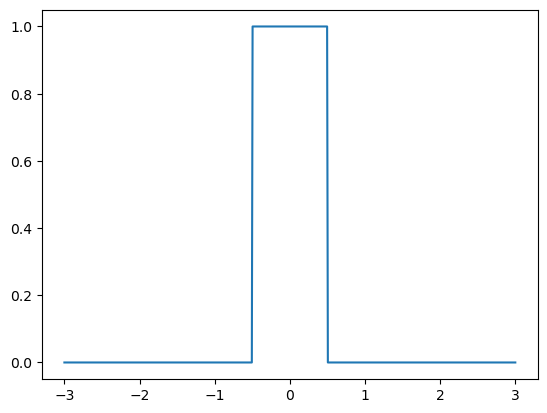

In [24]:
x = np.linspace(xlow,xupper,mx)
plt.plot(x,frames[0])

In [30]:

figs = []
hauteurs = []
hmax = frames.max()
L  = (xupper+xlow)/2
temps_in = np.linspace(0,tmax,NbSim)
def ExportAnimation():
    
   
    for i in range(0,NbSim):
         
        h_i = frames[i]
        hauteurs.append(h_i)
        fig  = plt.figure( figsize=(10,2))
        axes = plt.subplot(1, 1, 1)
        
        axes.set_xlabel(r'$x $',fontsize=14)
        axes.set_ylabel(r'$z $',fontsize=14)
        axes.set_ylim((0,hmax))

        
        axes.set_xlabel(r'$x $',fontsize=14)
        axes.set_ylabel(r'$z $',fontsize=14)
         

        text = axes.text(L/2,  0.8*hmax, '')
        tt = temps_in[i]
        val = f'{tt:.1f}'
        text.set_text(r'$ t = {} $ s '.format(val))
         
         

        axes.set_title(" ")
      

        axes.plot(x , h_i, color = 'deepskyblue')
        #axes.plot(distance, eta_i, 'b')
        figs.append(fig)
        plt.close(fig)
    return figs

In [31]:
figures = ExportAnimation()
animation_tools.interact_animate_figs(figures, manual=True)

interactive(children=(IntSlider(value=0, description='frameno', max=20), Button(description='Run Interact', st…

In [32]:
# Animation
images = animation_tools.make_images(figures)
anim = animation_tools.animate_images(images, figsize=(12,4))
HTML(anim.to_jshtml())